In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import math

In [3]:
df_from_json = pd.read_json('DataSets/SciFi_200000_ClusterMCHitAndTrackStudy.json')

In [4]:
df_from_json[[ 'MCParticlePID','MCParticleKey', 'MCHit_Y']]

,MCParticlePID,MCParticleKey,MCHit_Y
0,11,2361,[-234.2608795166]
1,11,2361,[-234.2608795166]
2,13,7425,[-1357.8205566406]
3,13,7425,[-1357.8205566406]
4,-11,7722,"[-819.907043457, -820.1041870117]"
5,-11,7722,"[-819.907043457, -820.1041870117]"
6,-211,8662,[-619.8460083008]
7,-211,8662,[-619.8460083008]
8,2212,7414,[-960.1837158203]
9,2212,7414,[-960.1837158203]


In [5]:
# Data columns
i = 0
for val in df_from_json.columns:
    print(i," ",val)
    i = i + 1

0   ClusterChannelID
1   ClusterChannelIDMat
2   ClusterChannelIDModule
3   ClusterChannelIDSipmCell
4   ClusterChannelIDSipmID
5   ClusterChannelIDStation
6   ClusterChannelLayer
7   ClusterChannelQuarter
8   ClusterFraction
9   ClusterSize
10   CosSlopeX
11   CosSlopeY
12   Energy
13   Hit_Zone
14   Hit_dxDy
15   Hit_dzDy_manually
16   Hit_w
17   Hit_yMax
18   Hit_yMin
19   MCHit_EntryX
20   MCHit_EntryY
21   MCHit_EntryZ
22   MCHit_ExitX
23   MCHit_ExitY
24   MCHit_ExitZ
25   MCHit_Physics
26   MCHit_X
27   MCHit_Y
28   MCHit_Z
29   MCParticleAccT
30   MCParticleAccTT
31   MCParticleBeta
32   MCParticleGamma
33   MCParticleIsLong
34   MCParticleIsSeed
35   MCParticleKey
36   MCParticleP
37   MCParticlePID
38   MCParticlePhi
39   MCParticlePseudoRapidity
40   MCParticlePt
41   MCParticleVirtualMass
42   MCParticle_Physics
43   N_MC
44   PathLength
45   PrHit_XatYEq0
46   PrHit_ZatYEq0
47   Residual_X
48   Residual_Z
49   isNoiseCluster
50   isT1
51   isT2
52   isT3
53   isU
54   isV


In [343]:
# Get values, thus converting it to arrays
hits = df_from_json.values

numpy.ndarray

In [8]:
t1 = np.where(hits[:,50])[0]
t2 = np.where(hits[:,51])[0]
t3 = np.where(hits[:,52])[0]

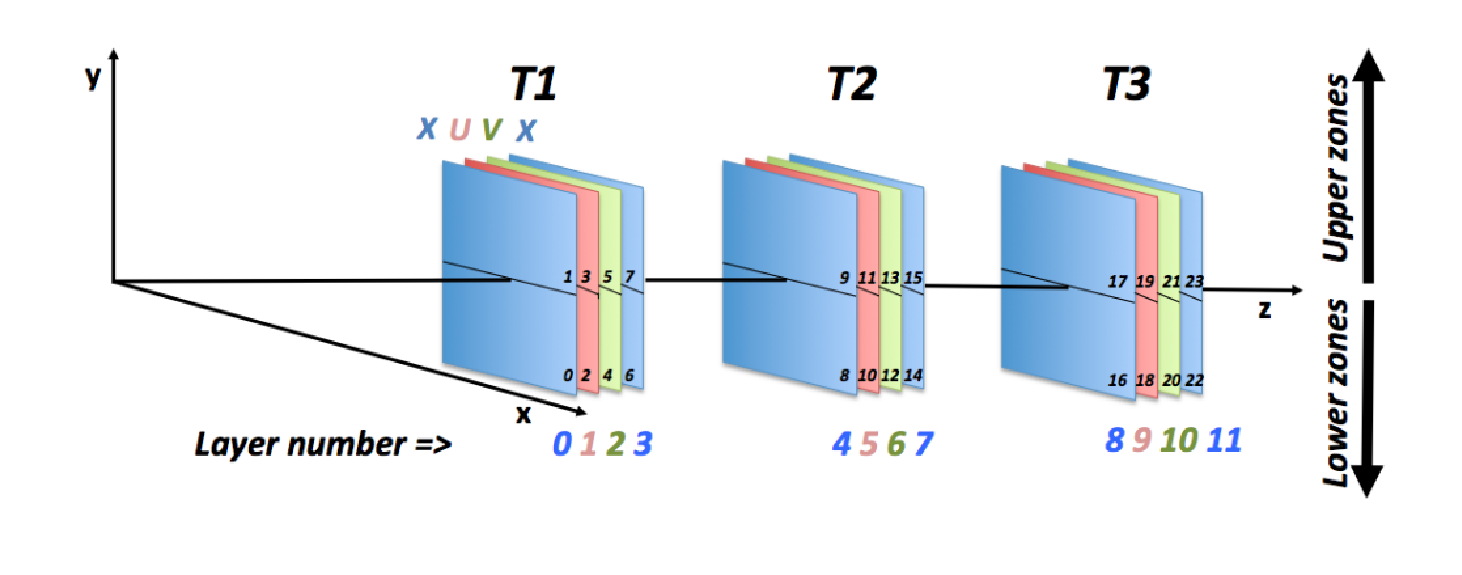

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Structure.png')
plt.figure(figsize=(15, 8), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(img) 
plt.axis('off')
plt.show()

In [10]:
# Extraction of the layers from the dataset
# It has the following structure
# E.g. For station 1: [[Zone_0, Zone_1], [Zone_2,Zone3], [Zone_4,Zone_5], [Zone_6, Zone_7]]
def createStationLayers(station):
    station_layers = []
    zone = (station - 1) * 8 
    for index in range(4):
        layer = []
        station_layers.append(hits[((hits[:,57] > (zone - 1)) & (hits[:,57] < zone + 2))])
        zone = zone + 2
    return station_layers

In [11]:
def show3DMCPlotHits(hitSet, max):
    X = np.zeros(shape=(max))
    Y = np.zeros(shape=(max))
    Z = np.zeros(shape=(max))
    
    i = 0
    for value in hitSet:
        X[i] = (value[26][0])
        Y[i] = (value[27][0])
        Z[i] = (value[28][0])
        i = i + 1
        if i == max:
            break
    
    Z = Z.reshape(-1,1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, s=3)
    # Plot the surface.
    ax.grid()
    plt.show()
    return ax

In [12]:
# Create a 2D plot based on the hitSet provided together with the defined columns in x_column and y_column
# The max value represents the maximum number of values to plot, suitable in case a lack of memory in the host
# executing it...

def show2DPlotHits(hitSet, x_column, y_column, max):
    if max < 0:
        X = np.zeros(shape=(hitSet.shape[0]))
        Y = np.zeros(shape=(hitSet.shape[0]))
    else:
        X = np.zeros(shape=(max))
        Y = np.zeros(shape=(max))
    
    i = 0
    for value in hitSet:
        if (type(value[x_column]) is list):
            X[i] = value[x_column][0]
            Y[i] = value[y_column][0]
        else:
            X[i] = value[x_column]
            Y[i] = value[y_column]
        i = i + 1
        if i == max:
            break
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, s=3)
    # Plot the surface.
    ax.grid()
    plt.show()

In [13]:
# Get hits for each layer
t1_layers = createStationLayers(1)
t1_layers = createStationLayers(2)
t1_layers = createStationLayers(3)

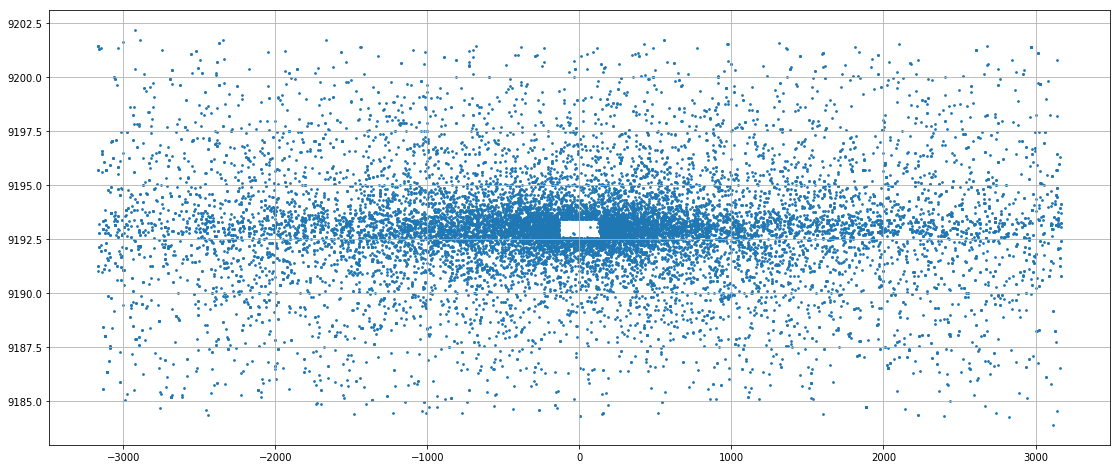

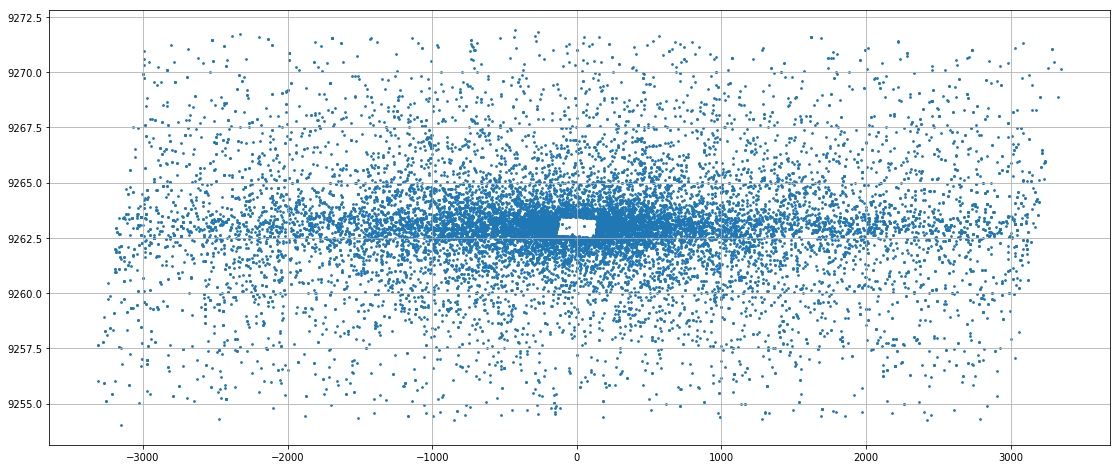

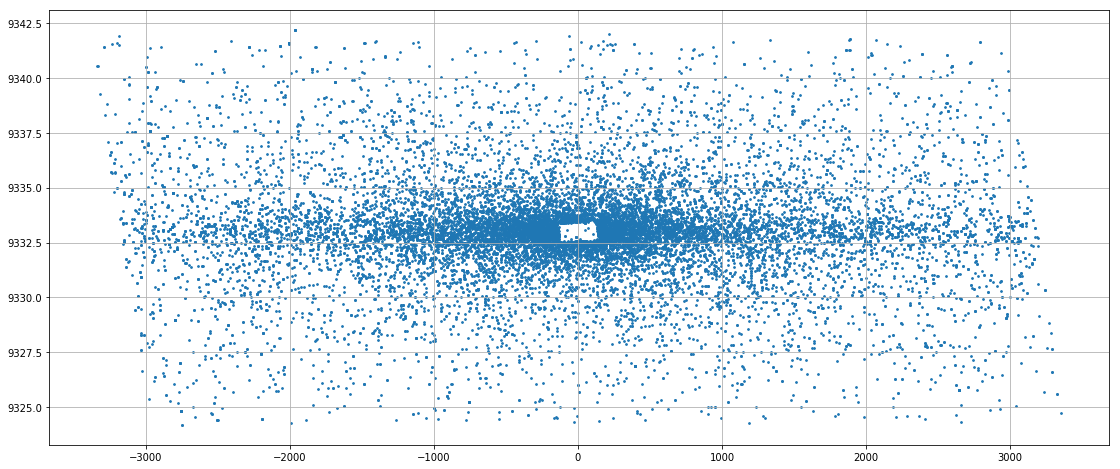

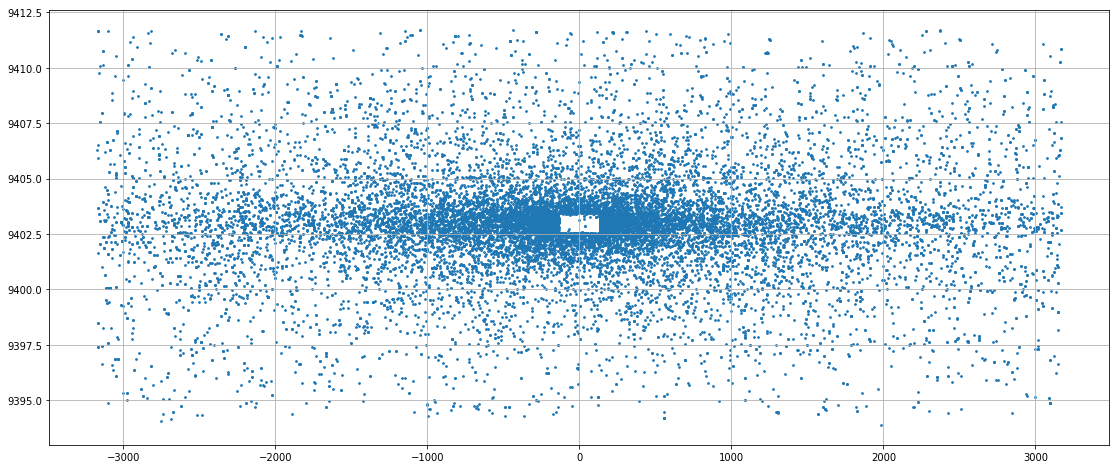

In [14]:
# Plotting MC hits of layer 0 based on the X and Z values
show2DPlotHits(t1_layers[0],26,28,-1)
show2DPlotHits(t1_layers[1],26,28,-1)
show2DPlotHits(t1_layers[2],26,28,-1)
show2DPlotHits(t1_layers[3],26,28,-1)

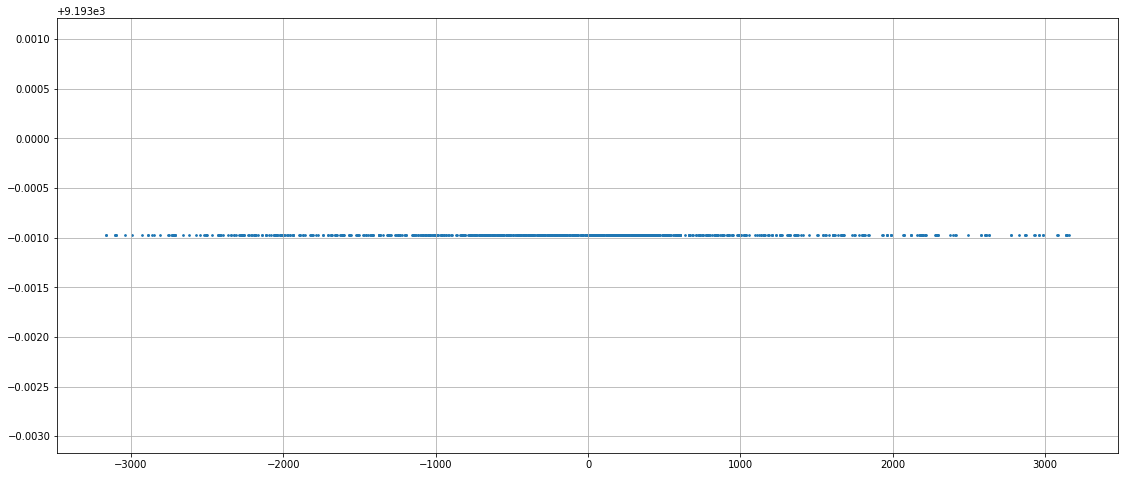

In [15]:
show2DPlotHits(t1_layers[0],45,46,1000)

In [16]:
def showTracksMCHits(hitSet, elev, angle, max):
    
    # Get the different keys from all hits (And discard the repeated ones)
    particleIds = np.unique(hitSet[:,35])
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0
    # Iterate through all the particles keys obtained 
    for particle in particleIds:
        
        # Get all hits from the given particle key
        particleHits = hitSet[np.where(hitSet[:,35] == particle]
        
        # Extract X,Y and Z from the particle hits
        X = [x[0] for x in particleHits[:,26]]
        Y = [x[0] for x in particleHits[:,27]]
        Z = [x[0] for x in particleHits[:,28]]
        
        ax.plot(X, Z, Y)
        ax.text(X[0], Y[0], Z[0], color='r', s='asdadsad')
            
        i = i + 1
        if i == max:
            break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-16-8114ee2b530f>, line 14)

In [339]:
def extractValue(dateSet):
    points = []
    history = 0
    for x in dateSet:
        if len(x) > 1:
            if history == 0:
                points.append(x[0])
            else:
                mostSimilar = np.abs(x[0] - history)
                ithValue = 0
                for i in range(0,len(x)):
                    absolute = np.abs(x[i] - history)
                    if (absolute < mostSimilar):
                        ithValue = i
                        mostSimilar = absolute
                history = x[ithValue]
                points.append(x[ithValue])
        else:
            history = x[0]
            points.append(x[0])
    return points
                    
def processMCHitsUniqueIds(hitSet, elev, angle, min, max):
    
    particleIds = np.unique(hitSet[:,35])
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0
    for i in range(min,len(particleIds)):
        
        particle = particleIds[i]
        print(particle)
        # Get all hits from the given particle key
        particleHits = hitSet[(hitSet[:,35] == particle) & (hitSet[:,37] != 11) & (hitSet[:,37] != -11)]
        uniqueParticle = np.unique(particleHits[:,36])
        print(uniqueParticle)
        print(particleHits[:,45:46])
        j = 0
        for unique in uniqueParticle:
            if unique == 1000010030:
                continue;
                
            hits = particleHits[np.where(particleHits[:,36] == unique)]
                        
            X = extractValue(hits[:,26])
            Y = extractValue(hits[:,27])
            Z = extractValue(hits[:,28])
            ax.plot(X, Z, Y)
            j = j + 1
            
        i = i + 1
        if i >= max:
            break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    plt.show()

<class 'numpy.ndarray'>
604
[124.0832063577]
[[-666.9399414062]
 [-339.5149841309]
 [-567.3850708008]
 [-566.4013061523]
 [-170.0480499268]
 [-950.1365356445]
 [-365.9937133789]
 [-365.3663024902]
 [-855.7850341797]
 [-227.5599975586]
 [-1281.3099365234]
 [-1280.4349365234]]


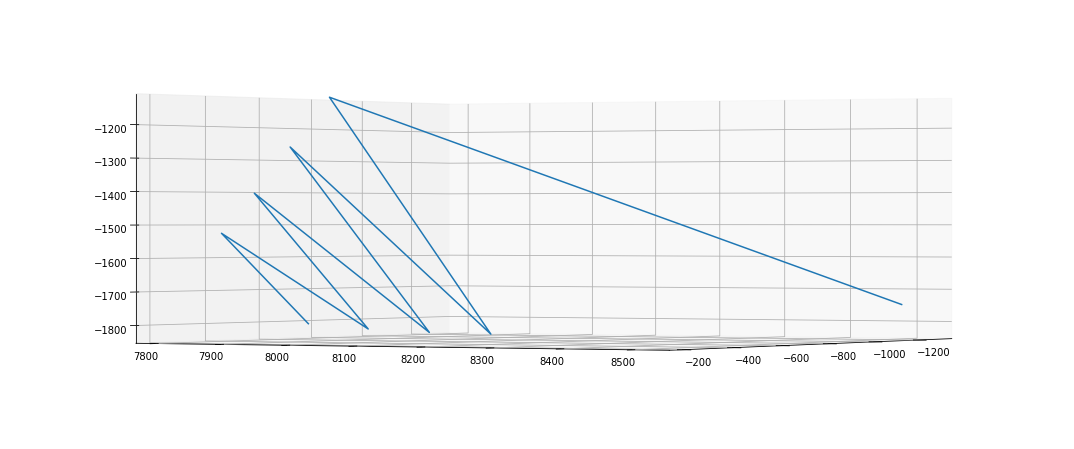

In [342]:
print(type(hits))
# TODO 43
# processMCHitsUniqueIds(hits, 45, 30, 100, 200)
processMCHitsUniqueIds(hits, 0, 30, 116, 116)

In [289]:
particleHits = hits[np.where(hits[:,35] == 505)]
toCompare = 3
print(particleHits[:,toCompare])

[505 505 505 505 505 505 505 505 505 505 505 505 505]


In [ ]:
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Z, Y)
ax.view_init(elev=0, azim=0)
ax.grid()
plt.show()